In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
train=pd.read_csv("bigdatamart_train.csv")

In [3]:
test=pd.read_csv("bigdatamart_Test.csv")

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [7]:
train.shape

(8523, 12)

In [8]:
test.shape

(5681, 11)

EDA
univariate data analysis

In [9]:
data=train.append(test)

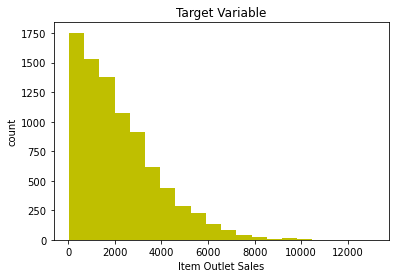

In [10]:
plt.hist(train['Item_Outlet_Sales'], bins = 20, color = 'y')
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

In [11]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [12]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [13]:
train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

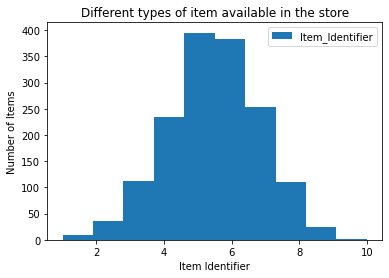

In [14]:
train['Item_Identifier'].value_counts(normalize = True)
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

In [16]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

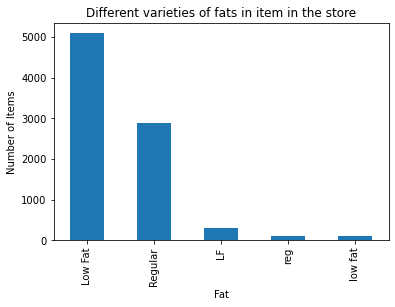

In [17]:
train['Item_Fat_Content'].value_counts(normalize = True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

In [18]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

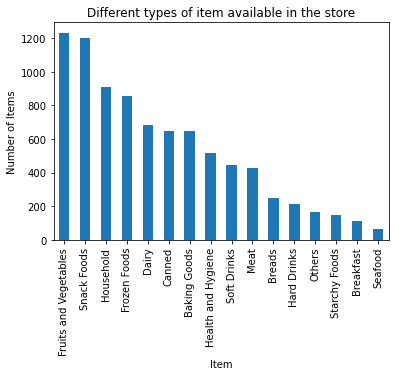

In [19]:
train['Item_Type'].value_counts(normalize = True)
train['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [20]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

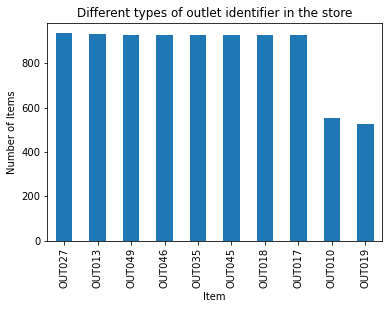

In [21]:
train['Outlet_Identifier'].value_counts(normalize = True)
train['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [22]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

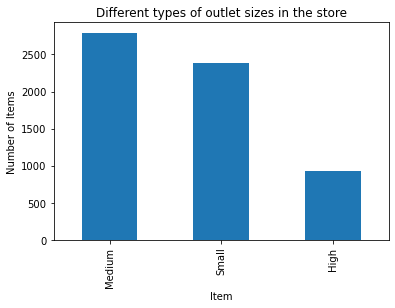

In [23]:
train['Outlet_Size'].value_counts(normalize = True)
train['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [24]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

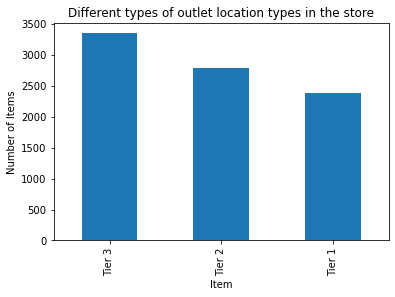

In [25]:
train['Outlet_Location_Type'].value_counts(normalize = True)
train['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Different types of outlet location types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [26]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

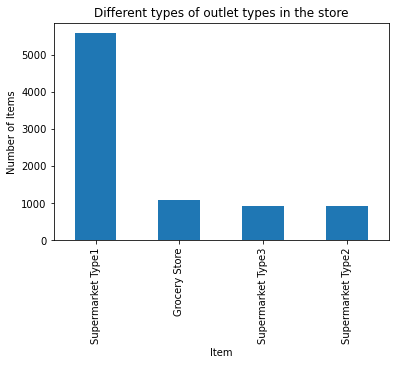

In [27]:
train['Outlet_Type'].value_counts(normalize = True)
train['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

<AxesSubplot:xlabel='Item_Fat_Content'>

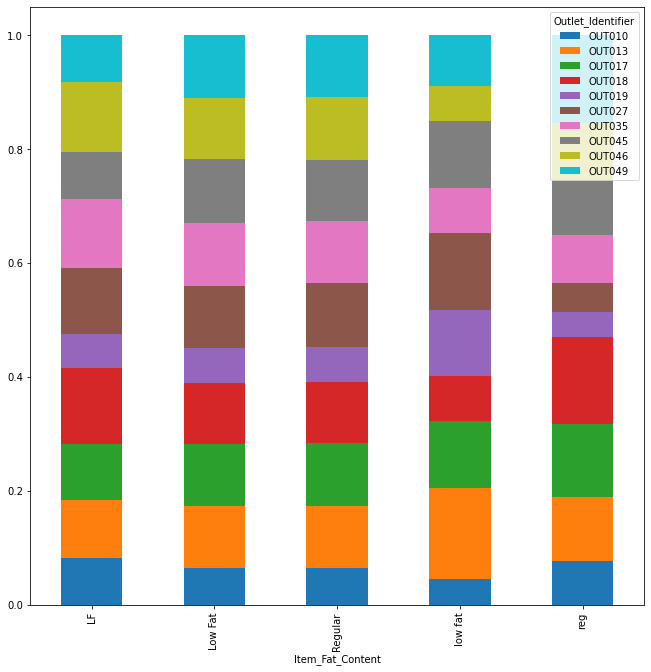

In [28]:
Item_Fat_Content = pd.crosstab(train['Item_Fat_Content'],train['Outlet_Identifier'])
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(11, 11))

<AxesSubplot:xlabel='Item_Type'>

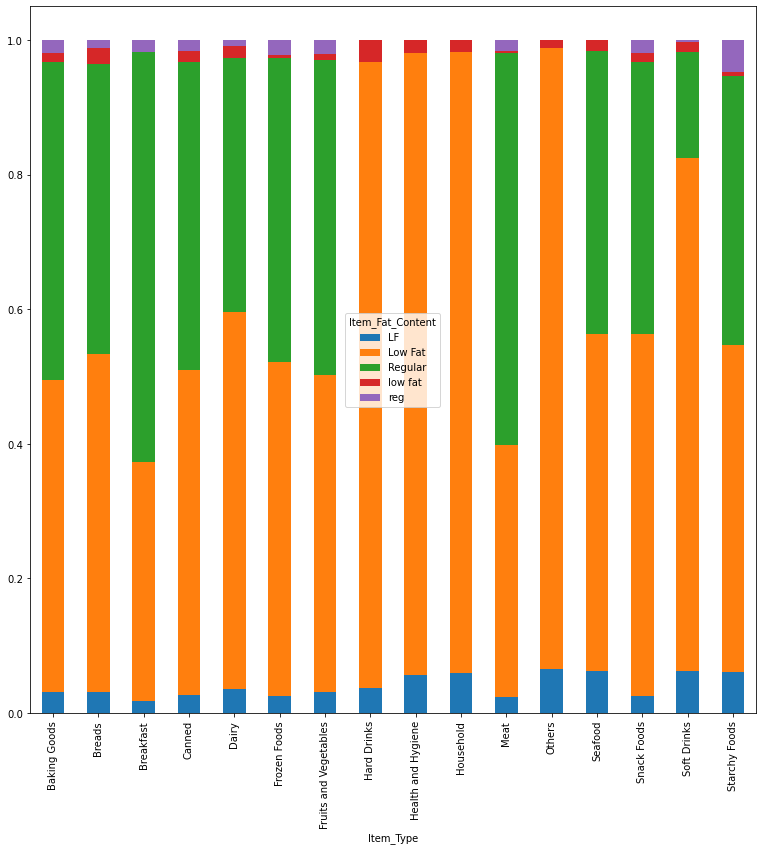

In [29]:
Item_Type = pd.crosstab(train['Item_Type'], train['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(13, 13))

In [30]:
data.apply(lambda x:len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [31]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [32]:
data['Item_Weight'] = data['Item_Weight'].replace(0, np.NaN)
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)

data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].replace(0, np.NaN)
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mode()[0], inplace = True)

data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [33]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [34]:
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

data['Item_Identifier'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_Identifier, dtype: int64

In [35]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].value_counts()

28    2439
26    1553
14    1550
16    1550
9     1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Years, dtype: int64

In [36]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,Food,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,Drinks,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,Food,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,Food,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,Non_Consumable,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [37]:
data = data.drop('Item_Identifier', axis = 1)

In [38]:
data.shape

(14204, 12)

In [39]:
data['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder

data.apply(LabelEncoder().fit_transform)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,284,0,1097,4,7567,9,4,1,0,1,2540,4
1,57,1,1436,14,632,3,8,1,2,2,422,0
2,376,0,1172,10,3897,9,4,1,0,1,1639,4
3,393,1,0,6,5626,0,3,1,2,0,670,5
4,265,0,0,9,848,1,1,0,2,1,865,7
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,298,1,718,13,3881,8,2,2,0,1,835,6
5677,180,1,11820,15,5069,3,8,1,2,2,835,0
5678,293,0,8009,8,3196,7,5,1,1,1,835,3
5679,354,1,0,3,6626,2,7,1,1,1,835,1


In [41]:
data = pd.get_dummies(data)
data.shape

(14204, 44)

In [42]:
x = data.drop('Item_Outlet_Sales', axis = 1)
y = data.Item_Outlet_Sales

In [43]:
x.shape

(14204, 43)

In [44]:
y.shape

(14204,)

In [45]:
train = data.iloc[:8523,:]
test = data.iloc[8523:,:]

In [46]:
train.shape

(8523, 44)

In [47]:
test.shape

(5681, 44)

In [48]:
x.skew()

Item_Weight                         0.111314
Item_Visibility                     1.195175
Item_MRP                            0.130728
Outlet_Establishment_Year          -0.396465
Outlet_Years                        0.396465
Item_Fat_Content_Low Fat           -0.613645
Item_Fat_Content_Regular            0.613645
Item_Type_Baking Goods              3.188122
Item_Type_Breads                    5.583994
Item_Type_Breakfast                 8.567051
Item_Type_Canned                    3.191879
Item_Type_Dairy                     3.097172
Item_Type_Frozen Foods              2.659666
Item_Type_Fruits and Vegetables     2.054787
Item_Type_Hard Drinks               6.022573
Item_Type_Health and Hygiene        3.690792
Item_Type_Household                 2.509852
Item_Type_Meat                      4.044381
Item_Type_Others                    6.910772
Item_Type_Seafood                  12.515386
Item_Type_Snack Foods               2.074854
Item_Type_Soft Drinks               4.077023
Item_Type_

In [49]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [50]:
x

array([[-0.80254709, -1.14923351,  1.62712671, ...,  0.72684099,
        -0.3494799 , -0.35112653],
       [-1.72441311, -1.03884353, -1.60272468, ..., -1.37581674,
         2.86139491, -0.35112653],
       [ 1.09748149, -1.12458588,  0.08164865, ...,  0.72684099,
        -0.3494799 , -0.35112653],
       ...,
       [-0.62478807,  0.39087421, -0.28684685, ...,  0.72684099,
        -0.3494799 , -0.35112653],
       [ 0.62066597, -1.75141686,  1.15249359, ...,  0.72684099,
        -0.3494799 , -0.35112653],
       [-0.75137104,  0.94303727, -0.96990624, ...,  0.72684099,
        -0.3494799 , -0.35112653]])

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [52]:
max_scr=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,random_state=i,test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i,"The model performs very well")
        print("At random state ",i)
        print("training r2_score is:-", r2_score(y_train,pred_train)*100)
        print("testing r2_score is:-", r2_score(y_test,pred_test)*100)

At random state 137 The model performs very well
At random state  137
training r2_score is:- 28.068725024790197
testing r2_score is:- 28.074763495953892
At random state 504 The model performs very well
At random state  504
training r2_score is:- 28.06659133895866
testing r2_score is:- 28.06808443330795


In [53]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x_t,y,random_state=348,test_size=0.20)

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

LASSO

In [55]:
from sklearn.linear_model import Lasso 

parameters = {'alpha':[.0001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [56]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train_b,y_train_b)
ls.score(x_train_b,y_train_b)
pred_ls=ls.predict(x_test_b)

lss=r2_score(y_test_b,pred_ls)
for j in range(2,10):
    lsscore=cross_val_score(ls,x_t,y,cv=j)
    lsc=lsscore.mean()
    print("At cv",j)
    print("Cross validation scoreis :-",lsc*100)
    print("r2 score is :-",lss*100)
    print("\n")
    

At cv 2
Cross validation scoreis :- -123.44041678433473
r2 score is :- 28.28659064054886


At cv 3
Cross validation scoreis :- -7.060962641663548e+32
r2 score is :- 28.28659064054886


At cv 4
Cross validation scoreis :- -4.214737802519278e+32
r2 score is :- 28.28659064054886


At cv 5
Cross validation scoreis :- -9.610038919858968e+32
r2 score is :- 28.28659064054886


At cv 6
Cross validation scoreis :- -4.078455176283685e+33
r2 score is :- 28.28659064054886


At cv 7
Cross validation scoreis :- -3.65610932768882e+32
r2 score is :- 28.28659064054886


At cv 8
Cross validation scoreis :- -1.0434420274962552e+33
r2 score is :- 28.28659064054886


At cv 9
Cross validation scoreis :- -3.978973645212228e+32
r2 score is :- 28.28659064054886




In [57]:
print("At cv :-",7)
print("Crosss validation score is :-",-3.656)
print("r2 score is :-",28.280)

At cv :- 7
Crosss validation score is :- -3.656
r2 score is :- 28.28


In [58]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [59]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_ls)))

Error:
Mean Absolute Error: 888.8911842348589
Mean Squared Error: 1476017.0293348595
Root Mean Square Error: 1214.9144123496353


<function matplotlib.pyplot.show(close=None, block=None)>

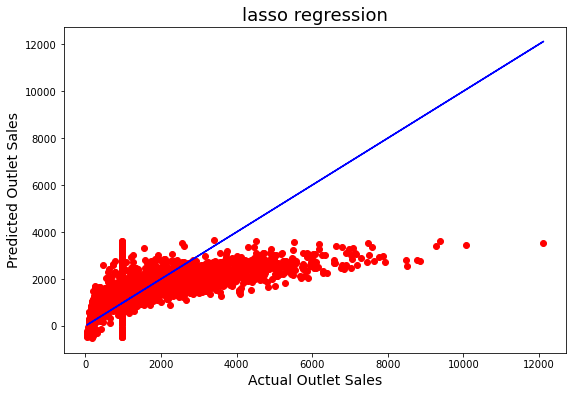

In [60]:
plt.figure(figsize=(9,6))
plt.scatter(x=y_test_b, y=pred_ls, color='r')
plt.plot(y_test_b, y_test_b, color='b')
plt.xlabel('Actual Outlet Sales',fontsize=14)
plt.ylabel('Predicted Outlet Sales',fontsize=14)
plt.title('lasso regression',fontsize=18)
plt.show

Ride Regressor

In [61]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .01, .1, 1, 10],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[.0001, .001, .01, 1, 1], 'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'alpha': 10, 'copy_X': True, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.0001}


In [62]:
rd=Ridge(alpha=10,copy_X=True,fit_intercept=True,normalize=False,random_state=0,tol=0.0001)
rd.fit(x_train_b,y_train_b)
rd.score(x_train_b,y_train_b)
pred_rd=rd.predict(x_test_b)

rds=r2_score(y_test_b,pred_rd)
print('R2 score is:-',rds*100)

rdscore =cross_val_score(rd,x_t,y,cv=3)
rdc = rdscore.mean()
print('Cross validation Score:-',rdc*100)


R2 score is:- 28.080217587775724
Cross validation Score:- -7.169049680014029e+32


In [63]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_rd)))

Error:
Mean Absolute Error: 891.0232580024103
Mean Squared Error: 1480264.6329979647
Root Mean Square Error: 1216.6612646903677


<function matplotlib.pyplot.show(close=None, block=None)>

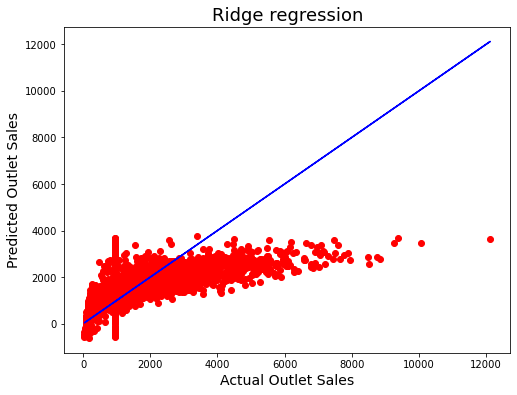

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_rd, color='r')
plt.plot(y_test_b, y_test_b, color='b')
plt.xlabel('Actual Outlet Sales',fontsize=14)
plt.ylabel('Predicted Outlet Sales',fontsize=14)
plt.title('Ridge regression',fontsize=18)
plt.show

Decision Tree Regressor

In [65]:
from sklearn.tree import DecisionTreeRegressor

parameters={'criterion':['mse','friedman_mse','mae'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'mae', 'splitter': 'random'}


In [66]:
dt=DecisionTreeRegressor(criterion='mae',splitter='random')
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b,y_train_b)
pred_decision=dt.predict(x_test_b)

dts=r2_score(y_test_b,pred_decision)
print('R2 score is:-',dts*100)

dtscore =cross_val_score(dt,x_t,y,cv=3)
dtc = dtscore.mean()
print('Cross validation Score:-',dtc*100)

R2 score is:- -42.916055131799325
Cross validation Score:- -1.1513809244546827e+33


In [67]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_decision)))

Error:
Mean Absolute Error: 1068.7203181978175
Mean Squared Error: 2941521.439631495
Root Mean Square Error: 1715.0864233709901


<function matplotlib.pyplot.show(close=None, block=None)>

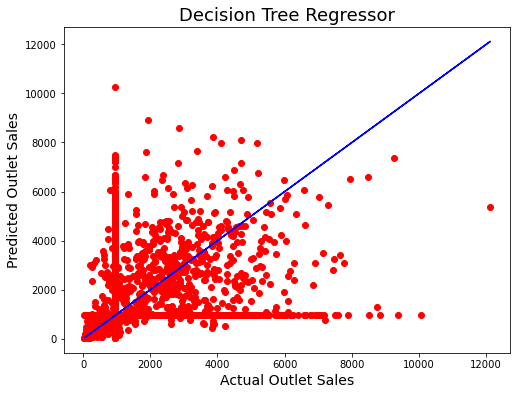

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_decision, color='r')
plt.plot(y_test_b, y_test_b, color='b')
plt.xlabel('Actual Outlet Sales',fontsize=14)
plt.ylabel('Predicted Outlet Sales',fontsize=14)
plt.title('Decision Tree Regressor',fontsize=18)
plt.show

The best model is Ridge regressor since the diffrence b/w the percentage score of cross validation and r2 score is optimum.

In [69]:
import pickle
filename='big_data_mart_sales.pkl'
pickle.dump(rd,open(filename,'wb'))